In [14]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# Data Gathering and Cleaning:

In [15]:
df = pd.read_csv('billboard_1970-2018.txt', sep='\t', encoding='mac_roman')
df

,date,title,artist,rank
0,12/5/1970,And The Grass Won't Pay No Mind,Mark Lindsay,52.0
1,12/5/1970,Beaucoups Of Blues,Ringo Starr,87.0
2,12/5/1970,Can't Get Over Losing You,Donnie Elbert,98.0
3,12/5/1970,Cry Me A River,Joe Cocker,30.0
4,12/5/1970,Green-Eyed Lady,Sugarloaf,29.0
...,...,...,...,...
20103,7/10/2018,Dura,Daddy Yankee,64.0
20104,7/11/2018,El Farsante,Ozuna & Romeo Santos,91.0
20105,7/12/2018,Esskeetit,Lil Pump,68.0
20106,7/13/2018,Everything's Gonna Be Alright,David Lee Murphy & Kenny Chesney,66.0


In [16]:
df.date.dtype # Checking what type the 'date' is. Doing so for later conversion

dtype('O')

### Formatting the date to the correct format instead of string:

In [17]:
df.date = pd.to_datetime(df.date) # Convert to date
df.tail()

,date,title,artist,rank
20103,2018-07-10,Dura,Daddy Yankee,64.0
20104,2018-07-11,El Farsante,Ozuna & Romeo Santos,91.0
20105,2018-07-12,Esskeetit,Lil Pump,68.0
20106,2018-07-13,Everything's Gonna Be Alright,David Lee Murphy & Kenny Chesney,66.0
20107,2018-07-14,Fake Love,BTS,71.0


In [18]:
df = df.set_index(['date']) # setting the date as the index
df

,title,artist,rank
date,,,
1970-12-05,And The Grass Won't Pay No Mind,Mark Lindsay,52.0
1970-12-05,Beaucoups Of Blues,Ringo Starr,87.0
1970-12-05,Can't Get Over Losing You,Donnie Elbert,98.0
1970-12-05,Cry Me A River,Joe Cocker,30.0
1970-12-05,Green-Eyed Lady,Sugarloaf,29.0
...,...,...,...
2018-07-10,Dura,Daddy Yankee,64.0
2018-07-11,El Farsante,Ozuna & Romeo Santos,91.0
2018-07-12,Esskeetit,Lil Pump,68.0


### Filtering out the data to only considering songs from the year 2000 onwards:

In [19]:
print(df.loc['2000-1-1':'2018-7-14']) # Want specific timeframe for songs
twok = df.loc['2000-1-1':]

                                    title  ...   rank
date                                       ...       
2000-01-01                      Gotta Man  ...   97.0
2000-01-01                    NAStradamus  ...  100.0
2000-01-01                          Steam  ...   99.0
2000-01-01                      Gotta Man  ...   97.0
2000-01-01                    NAStradamus  ...  100.0
...                                   ...  ...    ...
2018-07-10                           Dura  ...   64.0
2018-07-11                    El Farsante  ...   91.0
2018-07-12                      Esskeetit  ...   68.0
2018-07-13  Everything's Gonna Be Alright  ...   66.0
2018-07-14                      Fake Love  ...   71.0

[7508 rows x 3 columns]


In [20]:
twok

,title,artist,rank
date,,,
2000-01-01,Gotta Man,Eve,97.0
2000-01-01,NAStradamus,Nas,100.0
2000-01-01,Steam,Ty Herndon,99.0
2000-01-01,Gotta Man,Eve,97.0
2000-01-01,NAStradamus,Nas,100.0
...,...,...,...
2018-07-10,Dura,Daddy Yankee,64.0
2018-07-11,El Farsante,Ozuna & Romeo Santos,91.0
2018-07-12,Esskeetit,Lil Pump,68.0


In [21]:
pip install spotipy --upgrade

### Using the Spotify API to gather information about the songs in our dataset:
We have hidden the Client ID and Secret ID because it gives access to our personal Spotify accounts.

In [22]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

cid = 'Client ID'
secret = 'Secret ID'

ccm = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = ccm)

### Getting the Spotify ID for all the songs using API calls in a for loop:

In [23]:
trackid = []
for i in range(twok.title.count()):
  results = sp.search(q='track:' + twok.iloc[i].title + ' artist:' + twok.iloc[i].artist, type='track',limit=1)
  if (len(results['tracks']['items']) > 0):
    trackid.append(results['tracks']['items'][0]['uri'])
  else:
    trackid.append('NA')

In [24]:
twok['ID'] = trackid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Replacing the null values with NaN and dropping those values
since they will not have any information about them on Spotify:

In [25]:
twok['ID'] = twok['ID'].replace('NA', np.NaN)
twok = twok.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Getting the information we need by requesting from the API using a for loop and making a query using the Spotify IDs:
If there is no information about a particular song we put NaNs instead.

In [26]:
a = []
b = []
c = []
d = []
e = []
f = []
g = []
h = []
i = []
j = []
k = []
l = []

for z in range(twok['ID'].count()):
  features = sp.audio_features(tracks=[twok['ID'][z]])
  if (features[0] != None):
    a.append(features[0]['acousticness'])
    b.append(features[0]['danceability'])
    c.append(features[0]['duration_ms'])
    d.append(features[0]['energy'])
    e.append(features[0]['instrumentalness'])
    f.append(features[0]['key'])
    g.append(features[0]['liveness'])
    h.append(features[0]['loudness'])
    i.append(features[0]['speechiness'])
    j.append(features[0]['tempo'])
    k.append(features[0]['time_signature'])
    l.append(features[0]['mode'])
  else:
    a.append(np.NaN)
    b.append(np.NaN)
    c.append(np.NaN)
    d.append(np.NaN)
    e.append(np.NaN)
    f.append(np.NaN)
    g.append(np.NaN)
    h.append(np.NaN)
    i.append(np.NaN)
    j.append(np.NaN)
    k.append(np.NaN)
    l.append(np.NaN)

In [27]:
twok['acousticness'] = a
twok['danceability'] = b
twok['duration_ms'] = c
twok['energy'] = d
twok['instrumentalness'] = e
twok['key'] = f
twok['liveness'] = g
twok['loudness'] = h
twok['speechiness'] = i
twok['tempo'] = j
twok['time_signature'] = k
twok['mode'] = l
twok

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,title,artist,rank,ID,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,mode
date,,,,,,,,,,,,,,,,
2000-01-01,Gotta Man,Eve,97.0,spotify:track:5GDzpCJAhKjfzMEiXpYdhl,0.165000,0.800,264733.0,0.867,0.000352,5.0,0.1140,-4.001,0.1330,90.530,4.0,0.0
2000-01-01,NAStradamus,Nas,100.0,spotify:track:5IUceLAshLX0OSTAdSLcPv,0.000484,0.823,251933.0,0.620,0.000000,8.0,0.4940,-8.002,0.3290,90.570,4.0,1.0
2000-01-01,Steam,Ty Herndon,99.0,spotify:track:2sPXJCnKyQ1SWjc2JdFnQK,0.049700,0.676,216693.0,0.738,0.000003,6.0,0.0784,-6.693,0.0262,101.944,4.0,1.0
2000-01-01,Gotta Man,Eve,97.0,spotify:track:5GDzpCJAhKjfzMEiXpYdhl,0.165000,0.800,264733.0,0.867,0.000352,5.0,0.1140,-4.001,0.1330,90.530,4.0,0.0
2000-01-01,NAStradamus,Nas,100.0,spotify:track:5IUceLAshLX0OSTAdSLcPv,0.000484,0.823,251933.0,0.620,0.000000,8.0,0.4940,-8.002,0.3290,90.570,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-05,Cudi Montage,KIDS SEE GHOSTS,69.0,spotify:track:4kUZvXB3LC3an3HX6h0s17,0.401000,0.729,197001.0,0.504,0.000001,8.0,0.1210,-6.784,0.0321,110.011,4.0,0.0
2018-07-07,Delicate,Taylor Swift,25.0,spotify:track:6NFyWDv5CjfwuzoCkw47Xf,0.216000,0.750,232253.0,0.404,0.000357,9.0,0.0911,-10.178,0.0682,95.045,4.0,0.0
2018-07-10,Dura,Daddy Yankee,64.0,spotify:track:03w7ochPxgbi9W70aaF3BB,0.174000,0.783,200480.0,0.840,0.000000,1.0,0.4120,-3.416,0.0510,95.002,4.0,1.0


### Saving the progress in an updated csv file so we don't have to run the loops again since they took very long:

In [28]:
twok.to_csv('updated_twok.csv')

In [29]:
# https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b
# https://developer.spotify.com/dashboard/applications

## Examining the Data

Now we began actually looking at some of the trends of popular music!


In [30]:
up_twok = pd.read_csv('updated_twok.csv')
up_twok['tempo'] = up_twok['tempo'].round(0)
up_twok['rank'].describe()

count    5267.000000
mean       77.146003
std        21.480685
min         1.000000
25%        57.000000
50%        86.000000
75%        95.000000
max       100.000000
Name: rank, dtype: float64

## Feature Explanation

`acousticness - Float` : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

`danceability - Float` : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

`duration_ms - Integer` : The duration of the track in milliseconds.

`energy - Float` : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

`instrumentalness - Float` : Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

`key - Integer` : The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

`liveness - Float` : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

`loudness - Float` : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

`speechiness - Float` : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

`tempo - Float` : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

`time_signature - Integer` : An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure)

`mode - Integer` : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

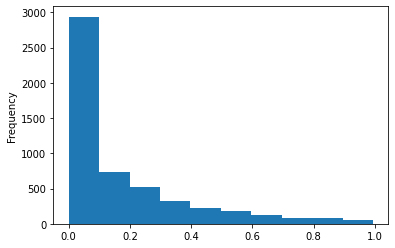

In [31]:
up_twok['acousticness'].plot(kind='hist') # Majority not acoustic (or found to not be acoustic)

count    5265.000000
mean        0.607803
std         0.145849
min         0.113000
25%         0.510000
50%         0.610000
75%         0.706000
max         0.981000
Name: danceability, dtype: float64


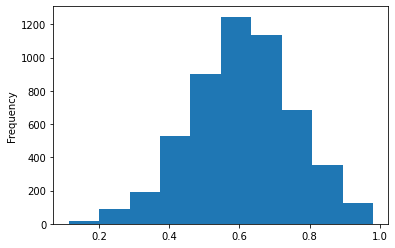

In [32]:
print(up_twok['danceability'].describe())
up_twok['danceability'].plot(kind='hist') # Danceability is pretty average

count    5265.000000
mean        3.840098
std         0.780745
min         0.770883
25%         3.375333
50%         3.751783
75%         4.188067
max        16.536000
Name: duration, dtype: float64


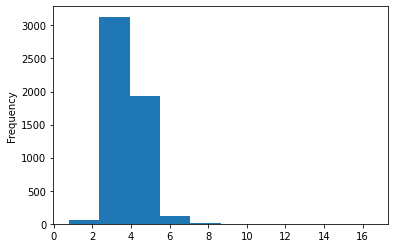

In [33]:
# Changing the duration in ms to Minutes
up_twok['duration'] = up_twok['duration_ms'] / 60000;
print(up_twok['duration'].describe())
up_twok['duration'].plot(kind='hist')

count    5265.000000
mean        0.696572
std         0.178639
min         0.056500
25%         0.575000
50%         0.723000
75%         0.839000
max         0.996000
Name: energy, dtype: float64


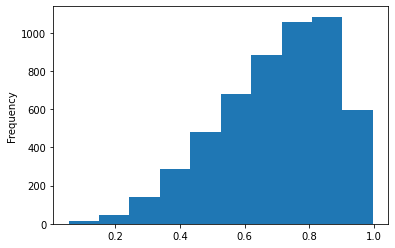

In [34]:
print(up_twok['energy'].describe())
up_twok['energy'].plot(kind='hist')

count    5265.000000
mean        0.010579
std         0.075479
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000031
max         0.982000
Name: instrumentalness, dtype: float64


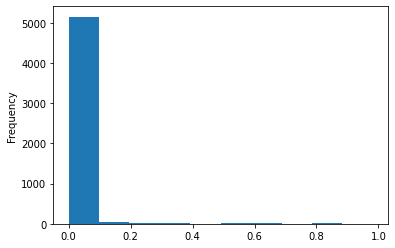

In [35]:
print(up_twok['instrumentalness'].describe());
up_twok['instrumentalness'].plot(kind='hist') # Wow that's crazy

1.0     590
0.0     583
7.0     569
2.0     519
9.0     457
11.0    426
4.0     418
5.0     411
6.0     404
8.0     392
10.0    337
3.0     159
Name: key, dtype: int64


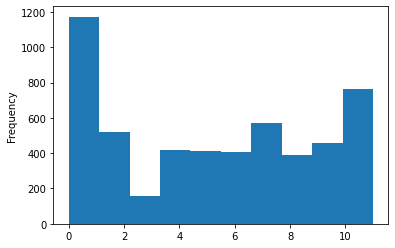

In [36]:
print(up_twok['key'].value_counts());
up_twok['key'].plot(kind='hist') # E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
# Majority of songs are in the key of 'C' 
# B is a
# Thing to note is that the far majority use non-sharp / flat keys

count    5265.000000
mean        0.182085
std         0.140467
min         0.019300
25%         0.093700
50%         0.126000
75%         0.235000
max         0.985000
Name: liveness, dtype: float64


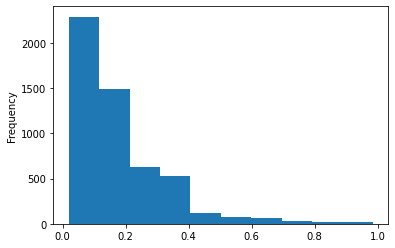

In [37]:
print(up_twok['liveness'].describe())
up_twok['liveness'].plot(kind='hist') #

count    5265.000000
mean       -5.895270
std         2.233313
min       -19.468000
25%        -7.031000
50%        -5.547000
75%        -4.330000
max        -0.463000
Name: loudness, dtype: float64


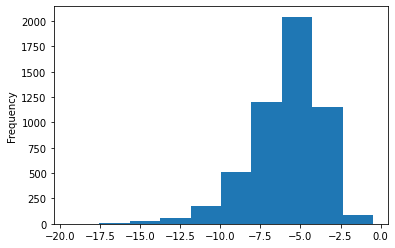

In [38]:
print(up_twok['loudness'].describe())
up_twok['loudness'].plot(kind='hist') # -5.0/-6.0 db is the sweet spot

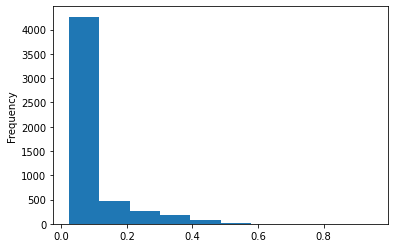

In [39]:
up_twok['speechiness'].plot(kind='hist') # Confirms we're not using any podcasts

count    5265.000000
mean      122.745489
std        29.468039
min        48.000000
25%        99.000000
50%       121.000000
75%       142.000000
max       211.000000
Name: tempo, dtype: float64


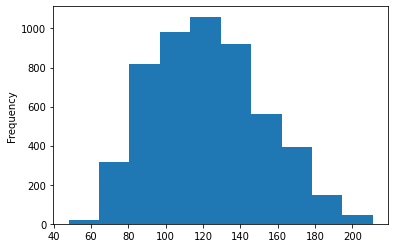

In [40]:
print(up_twok['tempo'].describe())
up_twok['tempo'].plot(kind='hist') # vast majority of songs are [80-140]

count    5265.000000
mean        3.963153
std         0.272488
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: time_signature, dtype: float64


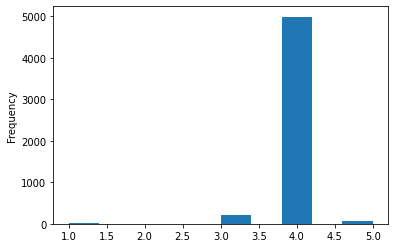

In [41]:
print(up_twok['time_signature'].describe())
up_twok['time_signature'].plot(kind='hist') # everything is 4/4...

count    5265.000000
mean        0.697436
std         0.459412
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: mode, dtype: float64


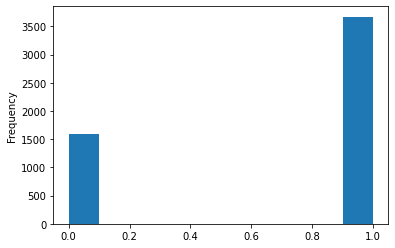

In [42]:
print(up_twok['mode'].describe())
up_twok['mode'].plot(kind='hist') # Pretty surprising split

# Grouping relevant Features for further EDA

In [43]:
bins = [0, 80,90,100,110,120,130,140,150]
labels = ['<80','80-90', '90-100', '100-110', '110-120', '120-130', '130-140', '140+']
up_twok['tempo_binned'] = pd.cut(up_twok['tempo'], bins=bins, labels=labels, right=False)
up_twok['tempo_binned'].value_counts()
# up_twok.groupby('')['tempo'].mean().plot(kind='bar') 

120-130    764
90-100     653
100-110    585
130-140    564
110-120    514
140+       511
80-90      407
<80        273
Name: tempo_binned, dtype: int64

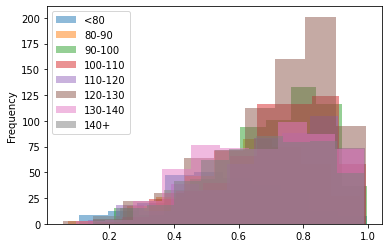

In [44]:
up_twok.groupby('tempo_binned')['energy'].plot(kind='hist', legend=True, alpha=0.5);

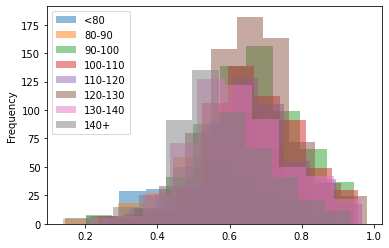

In [45]:
up_twok.groupby('tempo_binned')['danceability'].plot(kind='hist', legend=True, alpha=0.5);

#### Tempo_Binned with Danceability and Energy

As expected, our results show that when we group by Tempo, there is a correlation between high tempo and high energy/danceability. 

tempo_binned
<80        AxesSubplot(0.125,0.125;0.775x0.755)
80-90      AxesSubplot(0.125,0.125;0.775x0.755)
90-100     AxesSubplot(0.125,0.125;0.775x0.755)
100-110    AxesSubplot(0.125,0.125;0.775x0.755)
110-120    AxesSubplot(0.125,0.125;0.775x0.755)
120-130    AxesSubplot(0.125,0.125;0.775x0.755)
130-140    AxesSubplot(0.125,0.125;0.775x0.755)
140+       AxesSubplot(0.125,0.125;0.775x0.755)
Name: key, dtype: object

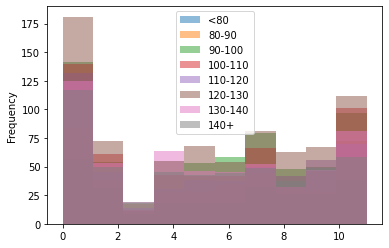

In [46]:
up_twok.groupby('tempo_binned')['key'].plot(kind='hist', legend=True, alpha=0.5) # There is no correlation between tempo and key!

# Machine Learning Exploration

Let's see if we can predict tempo using **energy, danceability, loudness, liveness**. 

In [47]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
up_twok # predict tempo using energy, danceability, loudness, liveness
x_train = up_twok[['energy', 'danceability', 'loudness', 'liveness']]
y_train = up_twok['tempo']
x_train = x_train.fillna(0)
y_train = y_train.fillna(0)

In [49]:
knn_reg = KNeighborsRegressor(n_neighbors=20)
knn_reg.fit(X=x_train, y=y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

In [50]:
gotta_man = [0.867, 0.800, -4.001, 0.1140]
knn_reg.predict(X=[gotta_man])

array([112.2])

In [51]:
up_twok.head(1)

,date,title,artist,rank,ID,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,mode,duration,tempo_binned
0,2000-01-01,Gotta Man,Eve,97.0,spotify:track:5GDzpCJAhKjfzMEiXpYdhl,0.165,0.8,264733.0,0.867,0.000352,5.0,0.114,-4.001,0.133,91.0,4.0,0.0,4.412217,90-100


In [52]:
up_twok.tail(2)

,date,title,artist,rank,ID,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,mode,duration,tempo_binned
5265,2018-07-12,Esskeetit,Lil Pump,68.0,spotify:track:44KKhCyI0BGS6LvVyDqJtH,0.02290,0.934,181714.0,0.505,0.0,11.0,0.0867,-7.648,0.1680,140.0,4.0,1.0,3.028567,140+
5266,2018-07-14,Fake Love,BTS,71.0,spotify:track:3aW0ds4A4tSQDIp75FqWTo,0.00267,0.557,242334.0,0.719,0.0,2.0,0.3060,-4.515,0.0372,78.0,4.0,0.0,4.038900,<80


In [53]:
BTS = [0.719, 0.557, -4.515, 0.306]
ESK = [0.505, 0.934, -7.648, 0.0867]
print(knn_reg.predict(X=[BTS]))
print(knn_reg.predict(X=[ESK]))

[108.2]
[112.3]


## Machine Learning Results

We did a quick little test of how KNeighbors Regressor would perform when trying to predict something simple like *tempo*.

We used a few examples, but either way you can see that it's still hard to predict.

# Conclusion

In conclusion, we can say that the Pop Songs from 2000-2018 featured very **energetic, danceable, fast** music that was often recorded in-studio. Pop Songs favor lyrics over instrumentals and the vast majority utilize the infamous *4 on the floor*.

Something that surpised the both of us was the use of **Minor** scale. We thought it would be **Major** dominated, but it turned out to be a 70/30 split. 
In addition, most **Keys** were used uniformly, except for the key of C and C#.

We also found a trend between the Tempo and the Energy and Danceability. In general, the higher the tempo, the more energetic and danceable the music is.


If you want to make the next Pop hit, use a 4/4, 120 BPM, C Major Scale song, that utilizes its tempo to make a song that is both energetic and danceable. 